In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [3]:
def create_visualization(df, show_std_shaded=True):
    # Group data by 'Model', 'Minimum Support', and 'Maximum Support' and calculate the mean and std Match Percentage
    grouped_df = df.groupby(['Model', 'Minimum Support', 'Maximum Support'], as_index=False)['Match Percentage'].agg(['mean', 'std']).reset_index()
    
    # Filter data by model names for the different lines
    models = grouped_df['Model'].unique()
    
    # Create a plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set up the Viridis colormap
    colormap = plt.cm.viridis
    colors = colormap(np.linspace(0, 1, len(models)))
    
    # Create a dictionary to map minimum and maximum support to the formatted string
    support_mapping = grouped_df[['Minimum Support', 'Maximum Support']].drop_duplicates()
    support_mapping['Support Range'] = support_mapping.apply(lambda row: f"{row['Minimum Support']}:{row['Maximum Support']}", axis=1)
    support_dict = dict(zip(zip(support_mapping['Minimum Support'], support_mapping['Maximum Support']), support_mapping['Support Range']))
    
    # Plot each model's data
    for idx, model in enumerate(models):
        model_data = grouped_df[grouped_df['Model'] == model]
        x_ticks = model_data[['Minimum Support', 'Maximum Support']].apply(tuple, axis=1).map(support_dict)
        ax.plot(x_ticks, model_data['mean'], label=model, color=colors[idx])
        
        if show_std_shaded:
            ax.fill_between(
                x_ticks,
                model_data['mean'] - model_data['std'],
                model_data['mean'] + model_data['std'],
                color=colors[idx],
                alpha=0.3
            )
    
    # Add the title and labels
    ax.set_title('Mean Match Percentage for Different Supports')
    ax.set_xlabel('Support Range')
    ax.set_ylabel('Mean Match Percentage')
    
    # Format y-axis ticks to show percentage
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
    
    # Set custom x-axis ticks
    ax.set_xticks(list(support_dict.values()))
    
    # Ensure x-axis labels are straight
    plt.xticks(rotation=0)
    
    # Add a legend
    ax.legend()
    
    return fig, ax

In [4]:
evaluation_path = '../evaluation/'
evaluation_summary_path = f'{evaluation_path}evaluation_summary.csv'

evaluation_summary = pd.read_csv(evaluation_summary_path)

model_name_mapping = {
    'mmsr_se5_newloss': 'fancy-water-85',
    'mmsr_se5_oldloss': 'rich-flower-83',
    'mmsr_se1_oldloss': 'sage-cloud-81',
    'self_trained_nsr': 'Baseline Model'
}

evaluation_summary['Model'] = evaluation_summary['Model'].replace(model_name_mapping)

In [5]:
minimum_supports = [-10, -5, -2.5, -1]
all_models = ['fancy-water-85', 'rich-flower-83', 'sage-cloud-81', 'Baseline Model']
models_to_compare = ['Baseline Model', 'fancy-water-85']
number_of_samples = 500

different_support_subranges_plot = evaluation_summary[(evaluation_summary['Model'].isin(models_to_compare)) & 
                  (evaluation_summary['Minimum Support'].isin(minimum_supports)) & 
                  (evaluation_summary['Number of Samples'] == number_of_samples) &
                  (evaluation_summary['Maximum Support'] == -evaluation_summary['Minimum Support'])]
        

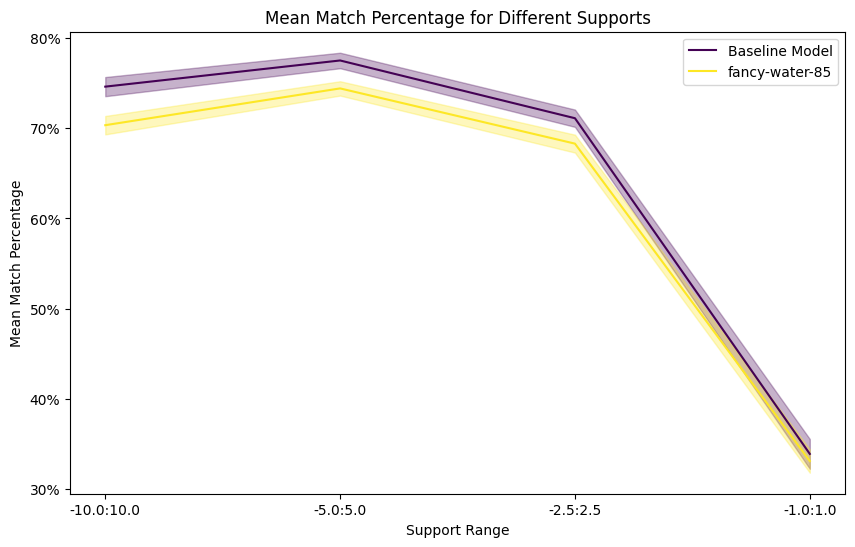

In [6]:
fig, _ = create_visualization(different_support_subranges_plot, show_std_shaded=True)
fig.show()